In [30]:
#Libraries

!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import LogisticRegression

#Import Hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [9]:
University=pd.read_csv("C:/Users/Akshay Yadav/Downloads/Data Science/CSV_Universities.csv")
University.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [10]:
University.columns
University.info()

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [11]:
University.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


# Standardization Function- to bring SAT-Top10 values into same range to compare(0-1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_University=scaler.fit_transform(University.iloc[:,1:])

# Observation: All values are now under 0-1 so we can now compare easily otherwise difference in range values make it hard to compare.
#scaled_University

In [26]:
#Normalization function
def norm_func(i):
    X=(i-i.min())/(i.max()-i.min())
    return (X)

In [28]:
#Normalized data frame (considering numerical part of data)
df_norm=norm_func(University.iloc[:,1:])
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


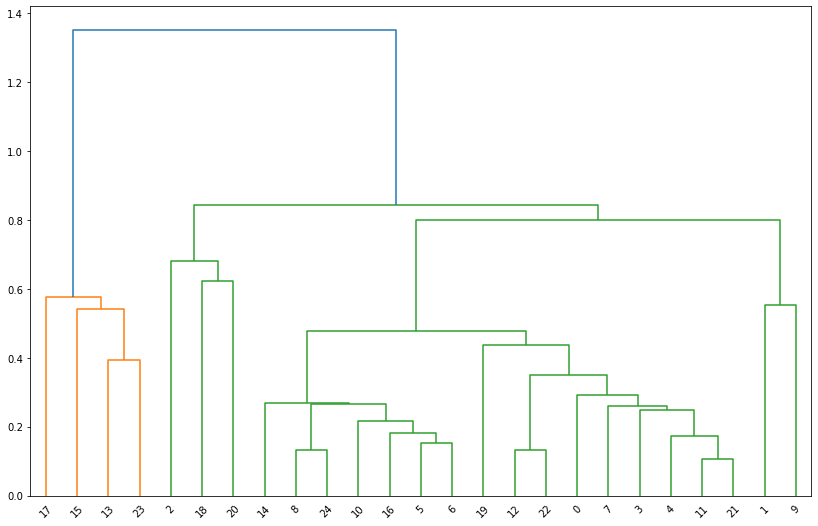

In [39]:
#Create Dendogram
plt.rcParams["figure.figsize"] = [14, 9]
dendrogram= sch.dendrogram(sch.linkage(df_norm, method="average"))

#Observation: We can have 5 or more dendrogram according to the figure.

In [41]:
#create clusters
hc= AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="average")

In [42]:
#Save cluster
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])
Clusters

#Observation: all 24 values shows that where it belongs in cluster.

,Clusters
0,3
1,2
2,4
3,3
4,3
5,3
6,3
7,3
8,3
9,2


In [43]:
df_norm["h_clusterid"]=Clusters
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,3
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,4
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,3
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,3
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,3
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,3
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,3
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,3
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,2


In [44]:
University["h_clusterid"]=Clusters
University

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [45]:
#df.norm.sort_values("h_clusterid")
University.sort_values("h_clusterid")

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
20,UMichigan,1180,65,68,16,15470,85,0
18,UCBerkeley,1240,95,40,17,15140,78,0
17,TexasA&M,1075,49,67,25,8704,67,1
15,Purdue,1005,28,90,19,9066,69,1
23,UWisconsin,1085,40,69,15,11857,71,1
13,PennState,1081,38,54,18,10185,80,1
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2
0,Brown,1310,89,22,13,22704,94,3
22,UVA,1225,77,44,14,13349,92,3


<Figure size 1008x648 with 0 Axes>

Text(0.5, 1.0, 'Clusters of University Score')

Text(0, 0.5, 'SAT')

Text(0, 0.5, 'GradRate')

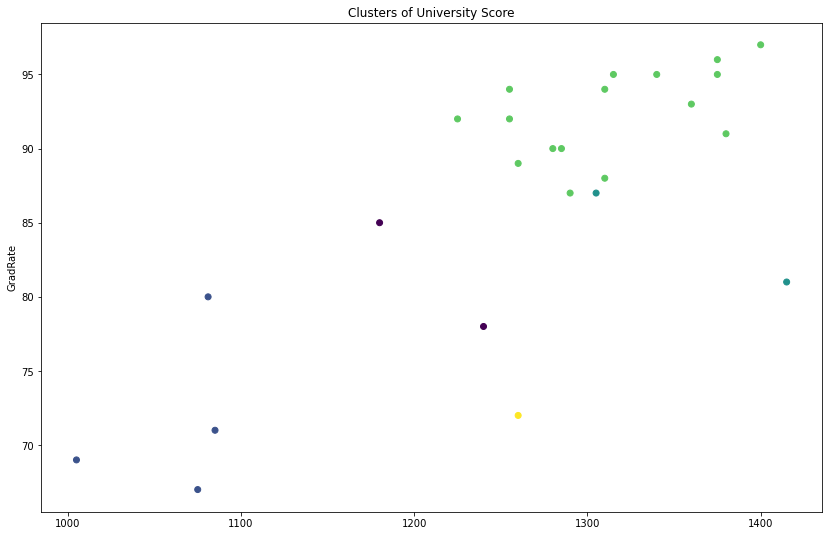

In [56]:
plt.figure(figsize=(14,9))
plt.scatter(University["SAT"],University["GradRate"],c=University.h_clusterid)
plt.title("Clusters of University Score")
plt.ylabel("SAT")
plt.ylabel("GradRate")


In [ ]:
#Observation :
Green color points shows that it belongs to GradRate of 92.
Dark Green points show that it belongs to GradRate of 84.

In [57]:
University.groupby("h_clusterid").agg(["mean"]).reset_index()

,h_clusterid,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1210.0000,80.00,54.0,16.500,15305.000,81.500
1,1,1061.5000,38.75,70.0,19.250,9953.000,71.750
2,2,1360.0000,87.50,34.5,6.500,61133.000,84.000
3,3,1313.4375,85.00,29.0,11.625,29186.625,92.375
4,4,1260.0000,62.00,59.0,9.000,25026.000,72.000
